In [151]:
import numpy as np
import matplotlib.pyplot as plt

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [152]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])
y = np.array([45, 55, 50, 59, 65,
    35, 75, 80, 50, 60])

In [153]:
def LR_with_l2(X, y, iterations, alpha = 1e-4, eps = 1e-3, lambda_ = 1e-8):
    np.random.seed(20)
    W = np.random.randn(X.shape[0])
    w_dist = np.inf
    i = 0
    while w_dist > eps and i < iterations:
        y_pred = np.dot(W, X)
        new_W = W - alpha*((2/X.shape[1]*np.dot(X, y_pred-y)) + lambda_*W)
        w_dist = np.linalg.norm(new_W-W, ord=2)
        #if i % 1000 == 0:
            #print(i, new_W)
        W = new_W
        i += 1
    return W

In [171]:
def data_std(data):
    d_mean = data.mean(axis=1)
    d_std = data.std(axis=1)
    res = np.zeros(data.shape)
    for index, row in enumerate(data):
        res[index] = (row - d_mean[index])/d_std[index]
    return res

In [172]:
X_st = data_std(X[1:])
X_st = np.append(X_st, np.ones((1,X.shape[1])), axis=0)
X_st

array([[-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [173]:
lambda_list = np.random.uniform(0,2, 500)
W_list = []
for x in lambda_list:
    W_list.append(LR_with_l2(X_st, y, 10000, lambda_ = x))

In [174]:
w0 = [x[0] for x in W_list]
w1 = [x[1] for x in W_list]
w2 = [x[2] for x in W_list]
w3 = [x[3] for x in W_list]

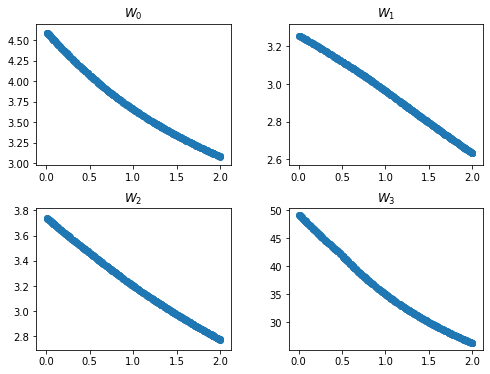

In [175]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(lambda_list, w0)
ax1.set_title('$W_0$')

ax2.scatter(lambda_list, w1)
ax2.set_title('$W_1$')

ax3.scatter(lambda_list, w2)
ax3.set_title('$W_2$')

ax4.scatter(lambda_list, w3)
ax4.set_title('$W_3$')

fig.set_size_inches(8,6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Ответ: Можно. Но это никак не повлияет на результат. Если мы применим нормализацию к стандартизированным данным, мы получим такие же данные, как если бы просто применили стандартизацию к исходным данным. Так же и наоборот.

In [188]:
def data_norm(data):
    data_min = data.min(axis=1)
    data_max = data.max(axis=1)
    res = np.zeros(data.shape)
    for index, row in enumerate(data):
        res[index] = (row - data_min[index])/(data_max[index]-data_min[index])
    return res

In [189]:
X_norm = data_norm(X[1:])
X_norm = np.append(X_norm, np.ones((1,X.shape[1])), axis=0)
X_norm

array([[0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]])

In [190]:
data_norm(X_st[:-1]), X_norm

(array([[0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ]]),
 array([[0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
         0.        , 0.5       , 1.        , 0.1       , 0.2       ],
        [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
         0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
        [0.        , 0.        , 0.5       , 0.        , 0.5       ,
         0.        , 1.        , 1.        , 0.        , 0.5       ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ]]))

In [191]:
data_std(X_norm[:-1]), X_st

(array([[-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
         -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
        [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
         -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
        [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
         -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]]),
 array([[-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
         -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
        [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
         -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
        [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
         -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.     

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [176]:
def LR_with_l1(X, y, iterations, alpha = 1e-4, eps = 1e-3, lambda_ = 1e-8):
    np.random.seed(20)
    W = np.random.randn(X.shape[0])
    w_dist = np.inf
    i = 0
    while w_dist > eps and i < iterations:
        y_pred = np.dot(W, X)
        new_W = W - alpha*((2/X.shape[1]*np.dot(X, y_pred-y)) + lambda_*np.sign(W))
        w_dist = np.linalg.norm(new_W-W, ord=2)
        #if i % 1000 == 0:
            #print(i, new_W)
        W = new_W
        i += 1
    return W

In [177]:
LR_with_l1(X_st, y, 10000)

array([ 4.60334901,  3.25780332,  3.74283812, 49.31624585])

In [178]:
LR_with_l1(X_st, y, 10000, lambda_ = 1)

array([ 4.42149274,  3.08466282,  3.5581235 , 48.88939439])